In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
X = df.drop('sales',axis=1)
y = df['sales']

### Polynomial Conversion

In [3]:
from sklearn.preprocessing import PolynomialFeatures
p_converter = PolynomialFeatures(degree = 3, include_bias=False)
p_features = p_converter.fit_transform(X)

### Train Test split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(p_features, y, test_size=0.25, random_state=50)

### Feature Scaling

/var/folders/wl/v3x3g82n3b38s3cvwvtr0r7h0000gn/T/ipykernel_1481/766547927.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train)
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


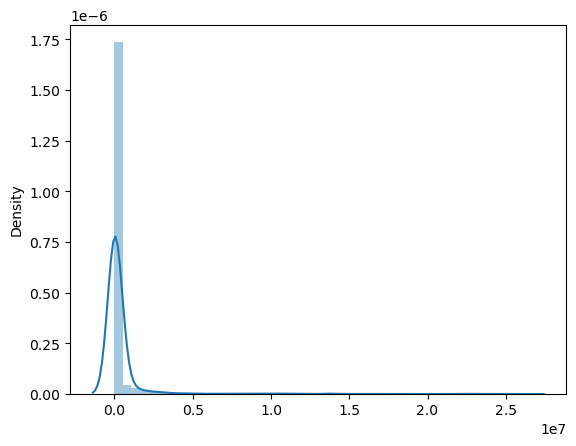

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sns.distplot(X_train)
plt.show()

In [6]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [7]:
sc_X_train = sc.transform(X_train)
sc_X_test = sc.transform(X_test)

/var/folders/wl/v3x3g82n3b38s3cvwvtr0r7h0000gn/T/ipykernel_1481/1103799795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc_X_train)
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


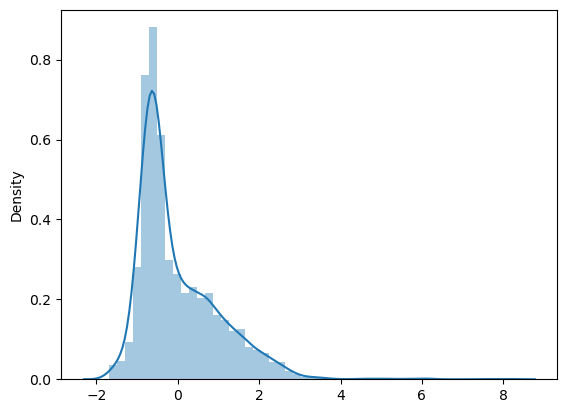

In [8]:
sns.distplot(sc_X_train)
plt.show()

### Ridge Regression

In [9]:
from sklearn.linear_model import Ridge

In [10]:
r_model = Ridge(alpha = 10)

In [11]:
r_model.fit(sc_X_train,y_train)

Ridge(alpha=10)

In [12]:
r_test_pred = r_model.predict(sc_X_test)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
MAE = mean_absolute_error(y_test,r_test_pred)
MAE

0.5045441562327635

In [15]:
MSE = mean_squared_error(y_test,r_test_pred)
MSE

0.37926409700520003

In [16]:
RMSE = np.sqrt(MSE)
RMSE

0.6158442148832771

### Ridge Regression CV

In [17]:
from sklearn.linear_model import RidgeCV

r_cv_model = RidgeCV(alphas = (0.5,0.8,0.9,0.1, 0.12))


In [18]:
r_cv_model.fit(sc_X_train,y_train)

RidgeCV(alphas=(0.5, 0.8, 0.9, 0.1, 0.12))

In [19]:
r_cv_model.alpha_

0.1

In [20]:
r_cv_test_pred = r_cv_model.predict(sc_X_test)

In [21]:
MAE_cv = mean_absolute_error(y_test,r_cv_test_pred)
MAE_cv

0.3327842205699968

In [22]:
MSE_cv = mean_squared_error(y_test,r_cv_test_pred)
MSE_cv

0.16134404044280765

In [23]:
RMSE_cv=np.sqrt(MSE_cv)
RMSE_cv

0.4016765370827722

In [24]:
r_cv_model.coef_

array([ 5.90707718,  0.40666931,  0.37913803, -7.07042739,  4.87834943,
       -0.62436522, -0.60573346,  0.1307523 , -0.41320244,  3.01588818,
       -1.09763244,  0.36251321,  0.34839606, -0.43780416,  0.31538478,
        0.25843224,  0.17329352,  0.11774792,  0.01869132])

### Lasso Regression

In [25]:
from sklearn.linear_model import LassoCV

In [27]:
#help(LassoCV)

In [28]:
lasso_cv_model = LassoCV(eps = 0.1, n_alphas=100, cv = 5, max_iter=100000)

In [29]:
lasso_cv_model.fit(sc_X_train,y_train)

LassoCV(cv=5, eps=0.1, max_iter=100000)

In [30]:
lasso_cv_model.alpha_

0.5278831021815013

In [32]:
lasso_cv_model_pred = lasso_cv_model.predict(sc_X_test)

In [33]:
MSE_l1_cv = mean_squared_error(y_test,lasso_cv_model_pred)
MSE_l1_cv

0.6000683986768208

In [34]:
MAE_l1_cv = mean_absolute_error(y_test,lasso_cv_model_pred)
MAE_l1_cv

0.534231490732425

In [35]:
RMSE_l1_cv = np.sqrt(MSE_l1_cv)
RMSE_l1_cv

0.7746408191393098

In [36]:
lasso_cv_model.coef_

array([1.09542675, 0.        , 0.        , 0.        , 3.99185976,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [39]:
p_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [38]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [40]:
230.1*37.8

8697.779999999999

### Elastic Net

In [41]:
from sklearn.linear_model import ElasticNetCV

In [52]:
el_model = ElasticNetCV(l1_ratio=[.01,0.1,0.5,0.75,0.9,0.95,1],eps=0.1,max_iter=1000000,cv=5)

In [53]:
el_model.fit(sc_X_train,y_train)

ElasticNetCV(cv=5, eps=0.1, l1_ratio=[0.01, 0.1, 0.5, 0.75, 0.9, 0.95, 1],
             max_iter=1000000)

In [54]:
el_model.l1_ratio_

1.0

In [56]:
#help(ElasticNetCV)

In [57]:
el_model.alpha_

0.5278831021815013

In [58]:
el_pred = el_model.predict(sc_X_test)

In [59]:
MAE_el = mean_absolute_error(y_test,el_pred)
MAE_el

0.534231490732425

In [60]:
MSE_el = mean_squared_error(y_test,el_pred)
MSE_el

0.6000683986768208

In [61]:
RMSE_el = np.sqrt(MSE_el)
RMSE_el

0.7746408191393098

### Grid Search


searching through a variety of hyperparameters with a grid search

In [79]:
param_grid = {
    'alpha' : [0.1,1,5,10,50,75,100],
    'l1_ratio' : [0.05,.1,.5,.7,.9,.95,1],
    #'max_iter': [1000,100000,1000000]
}

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [81]:
base_el_model = ElasticNet()

In [82]:
grid_model = GridSearchCV(estimator=base_el_model,param_grid=param_grid,cv=5)

In [83]:
grid_model.fit(sc_X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 75, 100],
                         'l1_ratio': [0.05, 0.1, 0.5, 0.7, 0.9, 0.95, 1]})

In [84]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [85]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

### Use best model from grid search

In [88]:
y_pred = grid_model.predict(sc_X_test)
y_pred

array([13.63339986, 12.14705828,  8.75886672, 10.50233019, 10.70475874,
       18.23956528, 13.53029791,  7.11036569, 21.44174982, 11.6254028 ,
       12.41940324, 12.39263124, 22.50564573, 14.09189319, 12.54918785,
       16.73039157, 10.68155831, 15.69600837,  9.32136643, 12.5807486 ,
       15.97076704, 10.43953734,  9.23759844, 11.96209842, 20.92820966,
       12.45652964,  8.88487596,  9.122169  , 15.18607797, 12.14406377,
       14.72865891, 10.22348887,  8.73354736, 16.22278354,  8.63489483,
        9.40305378, 12.8432073 , 20.42173383, 10.04032451, 11.11950146,
        8.7283035 , 26.45384582,  9.38498664, 18.63854642, 16.18579359,
       10.0682992 , 11.91031747, 12.38956282,  9.89155947,  7.93830941])

In [89]:
mean_squared_error(y_test,y_pred)

0.39284213520770694